#### Imports

In [2]:
import numpy as np
import scipy as sp 
import sympy as smp
import matplotlib.pyplot as plt
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Fourier Transform Cases

## 1. Fourier Transform of continuous time and frequency domains
- Analytical solution to functional form of series $x$ is known in domain, i.e: 

    you have a formula for $x(t)$, $\forall t \in \mathbb{R}$
    
<br>

- The transform is given by:
    
    $\hat{x}(f) = \int_\mathbb{R} x(t) e^{-2\pi i ft} dt$

<br>

_I can switch between the time and frequency basis_
#### Solving for transform $\hat{x}(f)$ **analytically**

In [3]:
t, f = smp.symbols('t,f', real=True) # time and frequency
k = smp.symbols('k', real=True, positive=True) # constant 
x = smp.exp(-k * t ** 2 ) * k * t # x is a functional variable
x

k*t*exp(-k*t**2)

In [4]:
from sympy.integrals.transforms import fourier_transform
x_FT = fourier_transform(x, t , k) # using analytical transform solutions to find functional form of the transform
x_FT

-I*pi**(3/2)*sqrt(k)*exp(-pi**2*k)

Note: Not all integrals can be evaluated analytically. For example:

In [5]:
x = smp.exp(-k * t ** 2) * smp.sin(k*t) * t *3
x

3*t*exp(-k*t**2)*sin(k*t)

cannot be solved analytically and the **above library uses only analytical results** to find the transform. So the _fourier_transform_ function from the library wont work. Need to use a **numerical** approach to solve improper integral.

In [6]:
from scipy.integrate import quad # integral solver 

def x(t, k):
    ''' Functional form of series'''
    return np.exp(-k * t ** 2) * np.sin(k*t) * t *3

def FT_x(x, f, k):
    ''' 
    Integral is in complex domain. Need to split integral into real and imaginary componensts since scipy cant handle complex integrals. Get transform for varying constant K  
    In python, 1j is imaginary unit. Usually denoted by i in textbooks
    '''

    FT_x_integrand_real = lambda t : np.real(x(t, k)*np.exp(-2 * np.pi*1j*f*t)) # look at the fourier transform above and convince yourself this is the integrand inside of np.real function
    FT_x_integrand_imag = lambda t : np.imag(x(t, k)*np.exp(-2 * np.pi*1j*f*t))

    x_FT_real = quad(FT_x_integrand_real, -np.inf, np.inf)[0]
    x_FT_imag = quad(FT_x_integrand_imag, -np.inf, np.inf)[0]

    return x_FT_real + 1j * x_FT_imag # combining real and imaginary values to create complex amplitdue 

Choose frequency domain bounds and compute transform's amplitude for domain

In [7]:
f = np.linspace(-3, 3, 1000)
# using np.vectorise to loop over frequency domain and compute transform's amplitudes for various freq range
x_FT = np.vectorize(FT_x)(x, f, k = 2) # constant fixed

Plotting amplitude profile in frequency domain

Text(0.5, 0, 't; time')

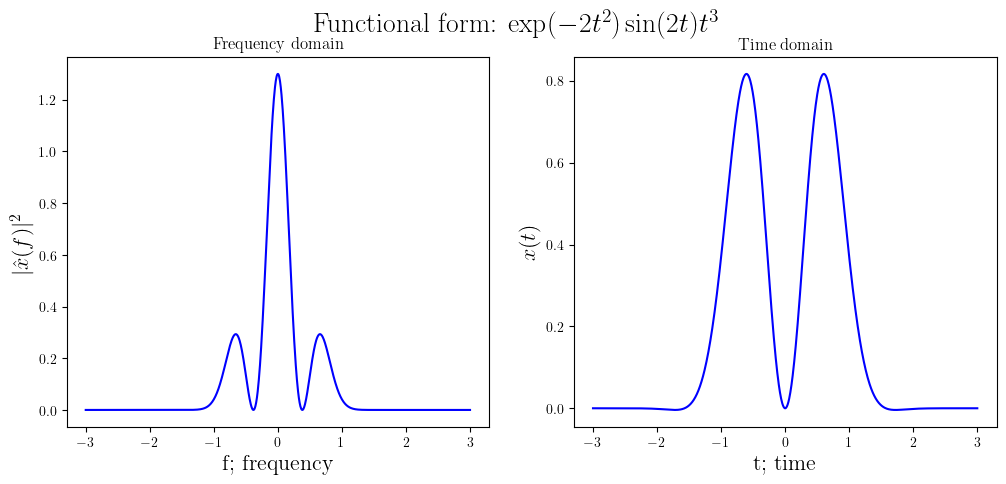

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.suptitle('Functional form: $\exp(-2t^2)\sin(2t)t^3$', size=20)
ax1.set_title("Frequency domain")
ax1.set_ylabel('$|\hat{x}(f)|^2$', size=16)
ax1.set_xlabel('f; frequency', size=16)
ax1.plot(f, np.abs(x_FT)**2, "b")

ax2.set_title("Time domain")
x_t = np.vectorize(x)(f, k=2)
ax2.plot(f, x_t, "b")
ax2.set_ylabel('$x(t)$', size=16)
ax2.set_xlabel('t; time', size=16)

## 2. Fourier **series**  of continuous time and discrete frequency domains 
- $x(t)$ is bounded between $0$ and $T$. 
    
    There is a _countably infinite set_ of frequencies. 
    
<br>

- The transform is given by:
    
    $\hat{x}(f_n) = \int_0^{T} x(t) e^{-2\pi i f_nt} dt$

    where:
        $f_n = \frac{n}{T}$
<br>
#### similarly as above can sometimes be solved analytically and sometimes numerically. 

In [21]:
import numpy as np 
from scipy.integrate import quad 
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


def compute_FT_integrand(x, f):

    real_ft_intgrd = lambda t : np.real( x(t) * np.exp(-2 * np.pi * 1j * f * t ))
    imag_ft_intgrd = lambda t : np.imag( x(t) * np.exp(-2 * np.pi * 1j * f * t ))
    
    imag_ft_int = np.imag(quad( real_ft_intgrd, -np.inf, np.inf))[0]
    real_ft_int = np.real(quad( imag_ft_intgrd, -np.inf, np.inf))[0]
    
    return real_ft_int + 1j *  imag_ft_int 

x_t = lambda t : np.exp(-t**2) * np.sin(2*t)*t**(1/2) * np.cos(4*t*2)

x_t = lambda t : np.exp(-t**2) * np.sinc(2*t)*t**(1/2)

# using np.vectorise to loop over frequency domain and compute transform's amplitudes for various freq range
f = np.linspace(-3, 3, 1000)
x_ft = np.vectorize(compute_FT_integrand)(x_t, f) # constant fixed

/tmp/ipykernel_178867/3828183911.py:21: RuntimeWarning: invalid value encountered in double_scalars
  x_t = lambda t : np.exp(-t**2) * np.sinc(2*t)*t**(1/2)
/home/akinwilson/.local/share/virtualenvs/comp-phys-ujS1Bu9o/lib/python3.10/site-packages/numpy/lib/function_base.py:2414: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


Text(0.5, 0, 't; time')

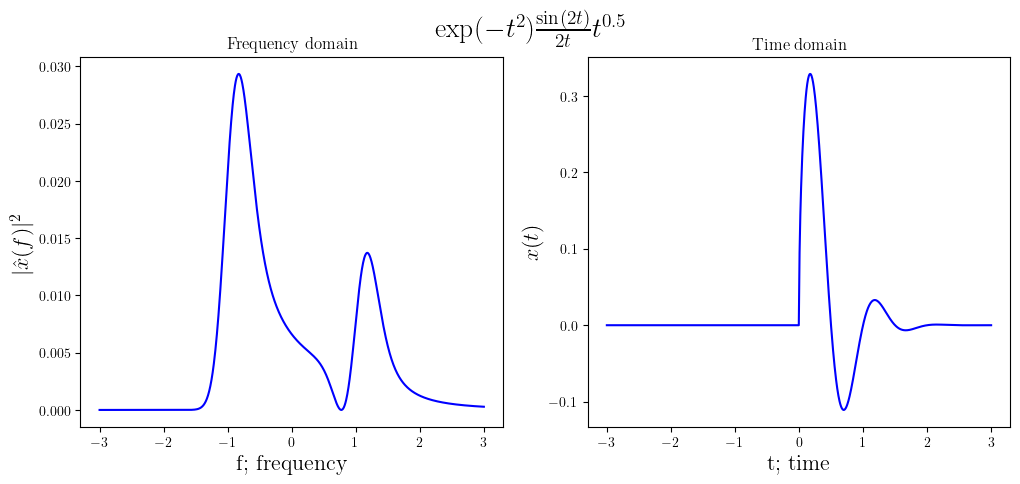

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)
# fig, ax1 = plt.subplots(1,2)
fig.set_figwidth(12)
fig.suptitle(r'$\exp(-t^2)\frac{\sin(2t)}{2t}t^{0.5}$', size=20)
ax1.set_title("Frequency domain")
ax1.set_ylabel('$|\hat{x}(f)|^2$', size=16)
ax1.set_xlabel('f; frequency', size=16)
ax1.plot(f, np.abs(x_ft)**2, "b")
ax2.set_title("Time domain")
x_t_wav = np.vectorize(x_t)(f)
ax2.plot(f, x_t_wav, "b")
ax2.set_ylabel('$x(t)$', size=16)
ax2.set_xlabel('t; time', size=16)

Note: above example is **not** the case for the discrete frequency domain. Wanted to review a function called the [sinc](https://en.wikipedia.org/wiki/Sinc_function) function